Data available at https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
car_dekho=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [207]:
car_dekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [208]:
car_dekho.shape

(4340, 8)

## EDD

In [209]:
#No need of column name and owner
car_dekho.drop(labels=['name','owner'],axis=1,inplace=True)

In [210]:
car_dekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
dtypes: int64(3), object(3)
memory usage: 203.6+ KB


In [211]:
car_dekho.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Visualizing relationship between km_driven and selling_price

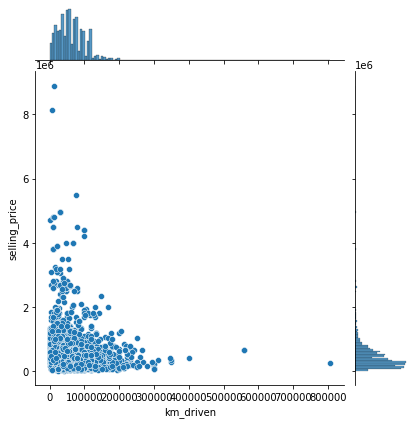

In [212]:
sb.jointplot(x='km_driven',y='selling_price',data=car_dekho)

#### Correlation matrix

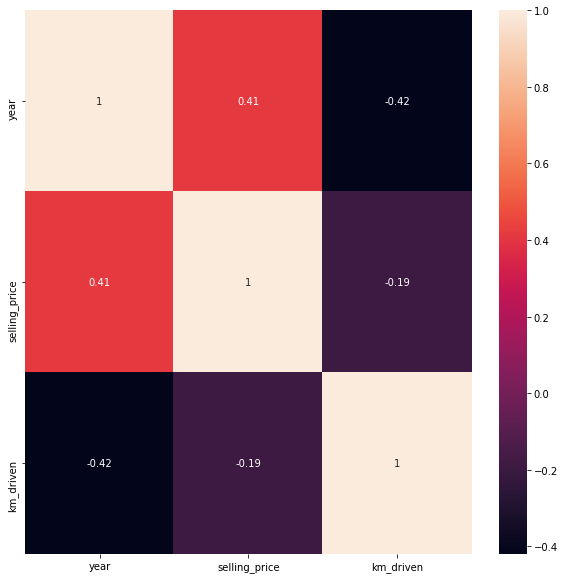

In [213]:
corrmat=car_dekho.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sb.heatmap(car_dekho[top_corr_features].corr(),annot=True)

<AxesSubplot:xlabel='fuel', ylabel='count'>

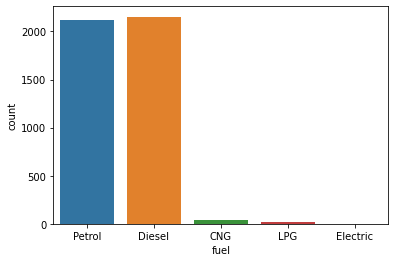

In [214]:
#Plotting the unique values in fuel column
sb.countplot(x='fuel',data=car_dekho)

### Converting categorical data into numerical data

In [215]:
car_dekho=pd.get_dummies(car_dekho,drop_first=True,columns=['fuel','seller_type','transmission'])

In [216]:
car_dekho.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,2007,60000,70000,0,0,0,1,1,0,1
1,2007,135000,50000,0,0,0,1,1,0,1
2,2012,600000,100000,1,0,0,0,1,0,1
3,2017,250000,46000,0,0,0,1,1,0,1
4,2014,450000,141000,1,0,0,0,1,0,1


### Adding a column for the age of car

In [217]:
car_dekho['age_of_car']=2021-car_dekho['year']

In [218]:
car_dekho.drop(labels=['year'],inplace=True,axis=1)

In [219]:
car_dekho.head()

,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,age_of_car
0,60000,70000,0,0,0,1,1,0,1,14
1,135000,50000,0,0,0,1,1,0,1,14
2,600000,100000,1,0,0,0,1,0,1,9
3,250000,46000,0,0,0,1,1,0,1,4
4,450000,141000,1,0,0,0,1,0,1,7


In [220]:
import seaborn as sb


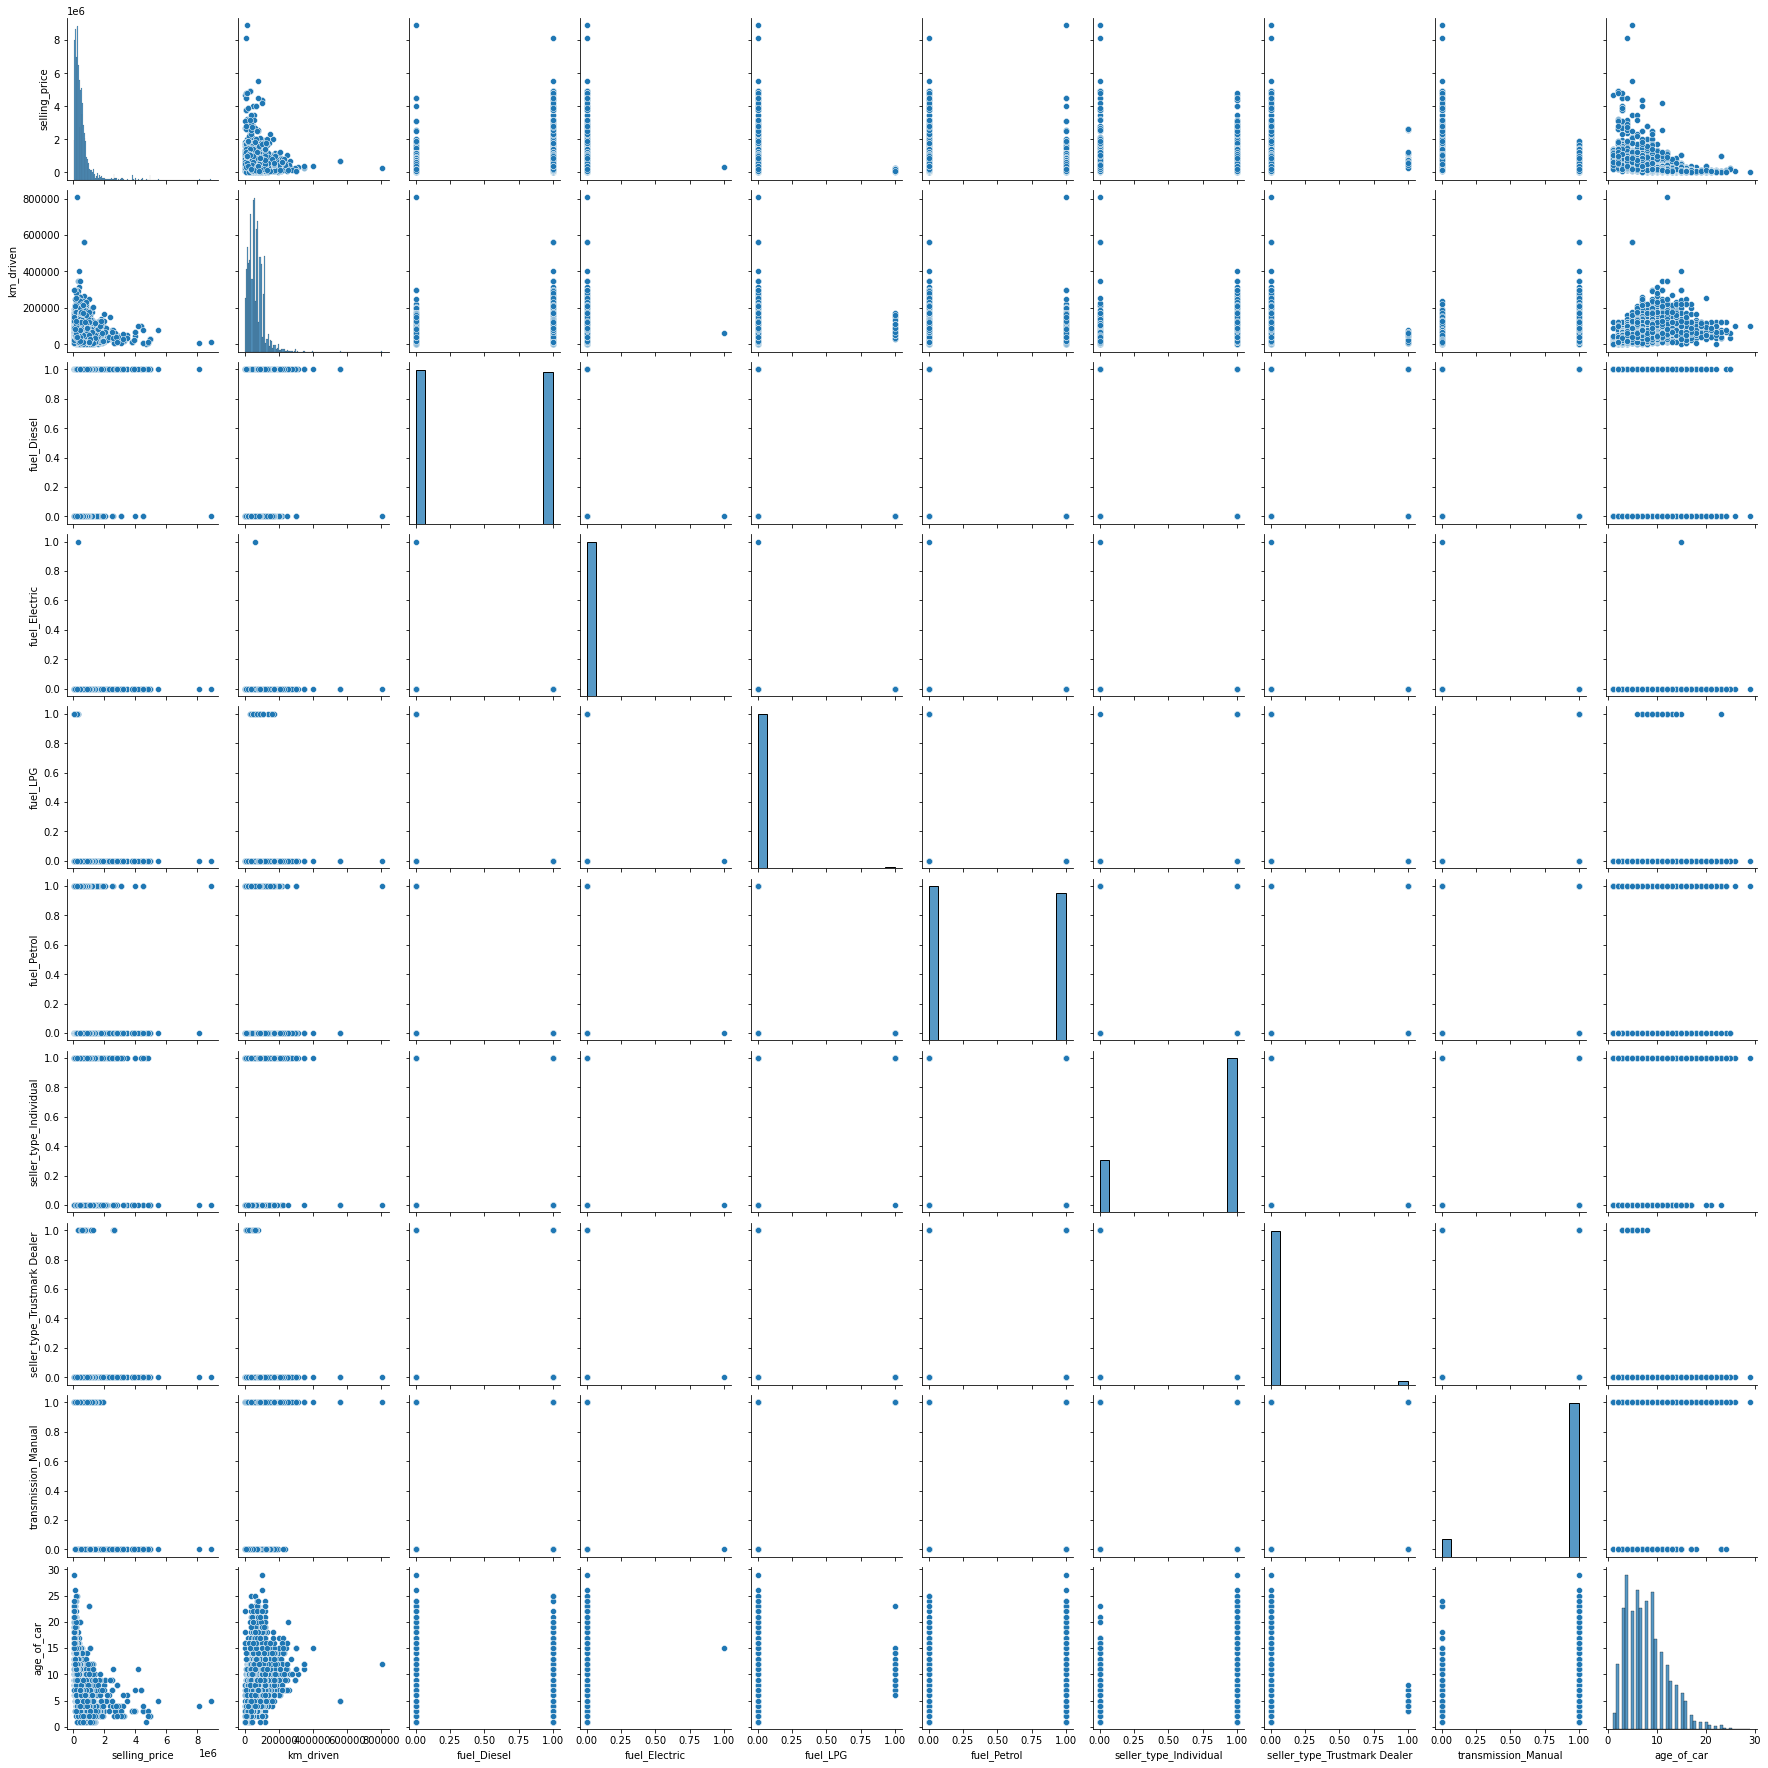

In [221]:
sb.pairplot(data=car_dekho)

In [123]:
car_dekho.head()

,selling_price,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,age_of_car
0,60000,70000,0,1,1,0,1,14
1,135000,50000,0,1,1,0,1,14
2,600000,100000,1,0,1,0,1,9
3,250000,46000,0,1,1,0,1,4
4,450000,141000,1,0,1,0,1,7


## Preparing data for training and testing

In [222]:
X=car_dekho.iloc[:,1:]
Y=car_dekho.iloc[:,0]

In [223]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=31,test_size=0.2)

### HYPERPARAMETER TUNING USING RANDOMIZED SEARCH CV

In [225]:
from sklearn.model_selection import RandomizedSearchCV

In [226]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 90, stop = 1300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 10]

In [227]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [228]:
from sklearn.ensemble import RandomForestRegressor

In [229]:
rfr=RandomForestRegressor()

In [230]:
rfr_rsc=RandomizedSearchCV(estimator=rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=1, random_state=31,n_jobs=1)

#### FITTING THE MODEL

In [231]:
rfr_rsc.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 12, 19, 26, 33, 40],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [90, 224, 358, 493, 627,
                                                         762, 896, 1031, 1165,
                                                         1300]},
                   random_state=31, scoring='neg_mean_squared_error',
                   verbose=1)

In [232]:
rfr_rsc.best_params_

{'n_estimators': 627,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 19}

In [233]:
rfr_rsc_best=rfr_rsc.best_estimator_

In [234]:
prediction=rfr_rsc.predict(X_test)

In [235]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(Y_test, prediction))

MSE: 212710790712.8491


In [236]:
rfr_rsc_best.score(X_train,Y_train)

0.8232235549745606

In [237]:
rfr_rsc_best.score(X_test,Y_test)

0.5402932296939085